In [ ]:
import pandas as pd
import numpy as np

reviews_df = pd.read_csv("//content//reviews_badminton_data.csv")

In [ ]:
reviews_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
reviews_df['Ratings'] = np.where((reviews_df['Ratings'] < 3), 0, reviews_df['Ratings'])
reviews_df['Ratings'] = np.where((reviews_df['Ratings'] >= 3), 1, reviews_df['Ratings'])

In [ ]:
reviews_df.head()


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",1
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,0


In [ ]:
numeric_columns = ['Up Votes', 'Down Votes']


In [ ]:
median_values_subset = reviews_df[numeric_columns].median()

In [ ]:
reviews_df[numeric_columns] = reviews_df[numeric_columns].fillna(median_values_subset)

In [ ]:
columns_to_drop = ['Month', 'Place of Review', 'Reviewer Name']
reviews_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
reviews_df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'reviews_df' is your DataFrame containing the reviews data
X = reviews_df[['Review text']]  # Independent variable(s)
y = reviews_df['Ratings']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6806, 1)
X_test shape: (1702, 1)
y_train shape: (6806,)
y_test shape: (1702,)


In [ ]:
import re

# Function to find emojis in text
def find_emojis(text):
    # Define regex pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

# Apply the function to find emojis in each review text
reviews_df['Emojis'] = reviews_df['Review text'].apply(find_emojis)

# Display reviews containing emojis
reviews_with_emojis = reviews_df[reviews_df['Emojis'].apply(len) > 0]
print("Reviews containing emojis:")
print(reviews_with_emojis[['Review text', 'Emojis']])

Reviews containing emojis:
                                            Review text        Emojis
14    really satisfied with the quality and the prom...           [👍]
55                       Low quality very bad quality 😡           [😡]
69                                   Very bad quality 👎           [👎]
88                                          it's awsm 😎           [😎]
103   This shuttle is the best one, it is excellent ...           [👍]
...                                                 ...           ...
8045                            Met the expectations 👌👌          [👌👌]
8117                                   Good quality...👌           [👌]
8138                        very bad quality 👎👎👎👎👎👎👎👎👎👎  [👎👎👎👎👎👎👎👎👎👎]
8234                        Best quality at best price👌           [👌]
8313                    Superb quality as aspected... 👍           [👍]

[249 rows x 2 columns]


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# The inflect library and demonstrate its usage for pluralizing words.

!pip3 install inflect
import inflect
p=inflect.engine()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
import string

In [ ]:
reviews_df['Review text'] = reviews_df['Review text'].str.replace("n't", " not")


In [ ]:
# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_review(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove emojis from the text
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove emails from the text
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Remove digits from the text
    text = re.sub(r'\d+', '', text)

    # Remove all alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove 'read' with or without spaces
    new_tokens = [token for token in tokens if token.lower()]

    # Handle 'not' and the following token together
    final_tokens = []
    i = 0
    while i < len(new_tokens):
        if new_tokens[i] == 'not' and i < len(new_tokens) - 1:
            final_tokens.append(f'not {new_tokens[i + 1]}')
            i += 1  # Skip the next token
        else:
            final_tokens.append(new_tokens[i])
        i += 1

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in final_tokens if token.lower() not in stop_words]

    # Join the lemmatized tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

# Apply the preprocess_review function to each row of the DataFrame
# X_train['Cleaned Review Title'] = X_train['Review Title'].apply(preprocess_review)
X_train['Cleaned Review Text'] = X_train['Review text'].apply(preprocess_review)

X_train.head()


,Review text,Cleaned Review Text
1372,Very good.,good
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...
333,Nice product. .,nice product
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...
3532,Better,better


In [ ]:
print(reviews_df.isnull().sum())

Review Title    0
Up Votes        0
Down Votes      0
Review text     0
Ratings         0
Emojis          0
dtype: int64


In [ ]:
X_train.columns

Index(['Review text', 'Cleaned Review Text'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer_bow = CountVectorizer()

# Fit-transform the 'Review text' columns
X_train_bow_text = vectorizer_bow.fit_transform(X_train['Cleaned Review Text'])

In [ ]:
X_train_bow_text

<6806x2054 sparse matrix of type '<class 'numpy.int64'>'
	with 22715 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of train features:", type(X_train_bow_text))

print("Shape of input data:", X_train_bow_text.shape)

Total unique words: 2054
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6806, 2054)


In [ ]:

X_train_bow_text_array = X_train_bow_text.toarray()

In [ ]:
print(X_train_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer_tfidf = TfidfVectorizer()

# Fit-transform the 'Review Title' and 'Review text' columns

X_train_tfidf_text = vectorizer_tfidf.fit_transform(X_train['Cleaned Review Text'])

In [ ]:

X_train_tfidf_text_array = X_train_tfidf_text.toarray()

In [ ]:
print(X_train_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Apply the preprocess_review function to each row of the DataFrame

X_test['Cleaned Review Text'] = X_test['Review text'].apply(preprocess_review)

X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [ ]:
# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Fit the CountVectorizer with the training data
X_train_bow_text = bow_vectorizer.fit_transform(X_train['Cleaned Review Text'])

# Transform the test data using the fitted CountVectorizer
X_test_bow_text = bow_vectorizer.transform(X_test['Cleaned Review Text'])

In [ ]:
X_test_bow_text

<1702x442 sparse matrix of type '<class 'numpy.int64'>'
	with 5051 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of test features:", type(X_test_bow_text))

print("Shape of input data:", X_test_bow_text.shape)

Total unique words: 2054
Type of test features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1702, 442)


In [ ]:

X_test_bow_text_array = X_test_bow_text.toarray()


In [ ]:
print(X_test_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# transform the 'Review text' columns

X_test_tfidf_text = vectorizer_tfidf.transform(X_test['Cleaned Review Text'])

In [ ]:
X_test_tfidf_text_array = X_test_tfidf_text.toarray()

In [ ]:
print(X_test_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [ ]:
X_test.shape


(1702, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Define Logistic Regression pipeline
log_reg_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', LogisticRegression(max_iter=1000))  # Increase max_iter value
])

# Fit the Logistic Regression model
start_time = time.time()
log_reg_pipeline.fit(X_train['Cleaned Review Text'], y_train)
training_time_log_reg = time.time() - start_time

# Print the training time
print("Logistic Regression - Training Time: %.2f seconds" % training_time_log_reg)

# Print the training and testing accuracy
train_score_log_reg = log_reg_pipeline.score(X_train['Cleaned Review Text'], y_train)
test_score_log_reg = log_reg_pipeline.score(X_test['Cleaned Review Text'], y_test)
print("Logistic Regression - Train Score: %.4f, Test Score: %.4f" % (train_score_log_reg, test_score_log_reg))


Logistic Regression - Training Time: 0.10 seconds
Logistic Regression - Train Score: 0.9345, Test Score: 0.9207


In [ ]:
!pip install --upgrade scikit-learn


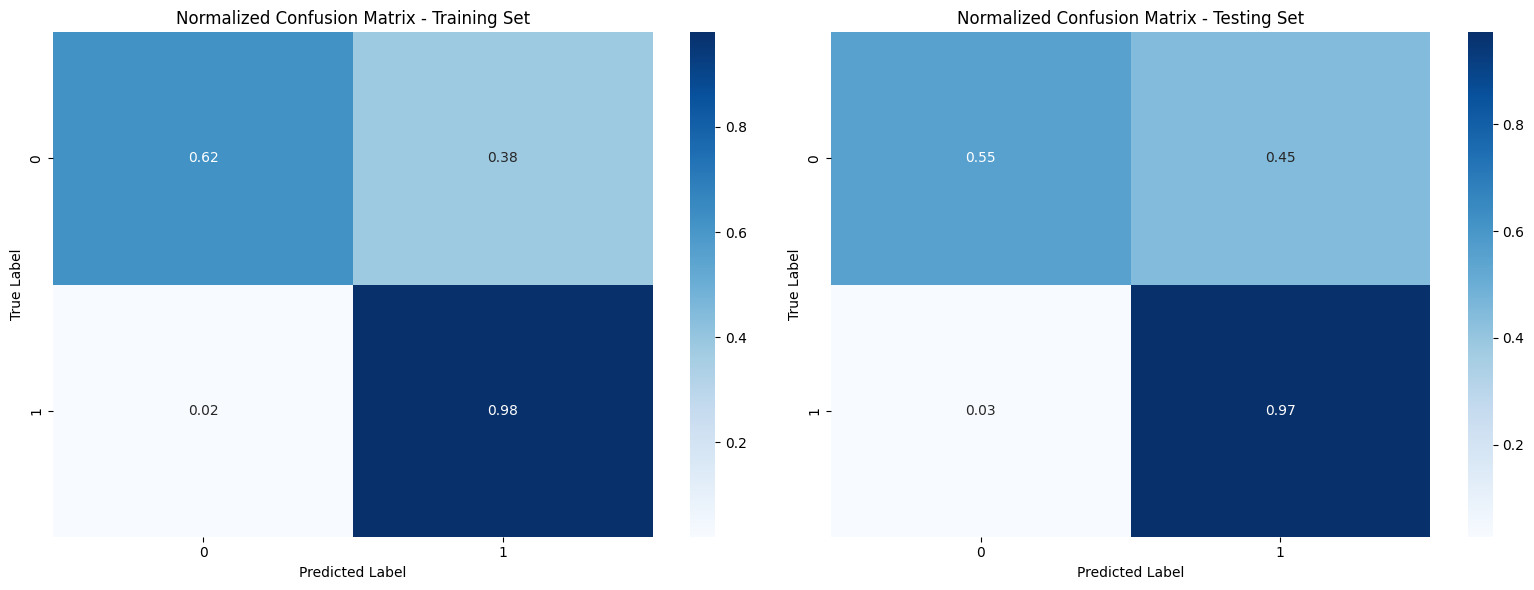

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions on training set
y_train_pred = log_reg_pipeline.predict(X_train['Cleaned Review Text'])

# Predictions on testing set
y_test_pred = log_reg_pipeline.predict(X_test['Cleaned Review Text'])

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Normalize confusion matrices
conf_matrix_train_normalized = conf_matrix_train.astype('float') / conf_matrix_train.sum(axis=1)[:, np.newaxis]
conf_matrix_test_normalized = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Normalized Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Normalized Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


In [ ]:
import pickle
# Save the trained model using pickle
with open('logistic_regression_tf-idf.pkl', 'wb') as f:
    pickle.dump(log_reg_pipeline, f)


In [ ]:
import joblib

# Save the trained model
joblib.dump(log_reg_pipeline, 'logistic_regression_tf-idf.pkl')


['logistic_regression_tf-idf.pkl']